In [45]:
#Importing the necessary packages
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from collections import Counter
import os

In [46]:
#Set working directory
os.chdir("C:\\Users\\baseer\\Desktop\\project")

In [47]:
#loading rain and test data astarin and test
train = pd.read_csv("train_cab.csv")
test=pd.read_csv("test.csv")

In [48]:
# Loading head of train dataset
train.head(3)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0


In [49]:
#loading head of test dataset
test.head(5)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [50]:
#description of our datatests
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [51]:
#describe test dataset
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [52]:
#describing target variable 
train['fare_amount'].describe()

count     16043
unique      468
top         6.5
freq        759
Name: fare_amount, dtype: object

In [53]:
#Converting the fare amount column into numeric data form
train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors='coerce')

In [54]:
## The fare amount column is having some neagative values, Lets Check it
Counter(train['fare_amount']<0)

Counter({False: 16064, True: 3})

In [55]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(train.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(train))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)


In [56]:
#analyzing Missing values 
missing_val

,Variables,Missing_percentage
0,passenger_count,0.342317
1,fare_amount,0.155598
2,pickup_datetime,0.000000
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000


In [57]:
#Impute the missing values
train["passenger_count"] = train["passenger_count"].fillna(train["passenger_count"].mean())
train["fare_amount"] = train["fare_amount"].fillna(train["fare_amount"].mean())

#train["passenger_count"] = train["passenger_count"].fillna(train["passenger_count"].median())
#train["fare_amount"] = train["fare_amount"].fillna(train["fare_amount"].median())


#check if any missing  value still exists
print("There are no missing values in data now  data:\n\n",train.isnull().sum())
print("\n")

There are no missing values in data now  data:

 fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64




In [58]:
#Split our Datetime into individual columns for ease of data processing and modelling
def align_datetime(df):
    df["pickup_datetime"] = df["pickup_datetime"].map(lambda x: str(x)[:-3])
    df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], format='%Y-%m-%d %H:%M:%S')
    df['year'] = df.pickup_datetime.dt.year
    df['month'] = df.pickup_datetime.dt.month
    df['day'] = df.pickup_datetime.dt.day
    df['weekday'] = df.pickup_datetime.dt.weekday
    df['hour'] = df.pickup_datetime.dt.hour
    return(df["pickup_datetime"].head())
    
align_datetime(train)
align_datetime(test)

0   2015-01-27 13:08:24
1   2015-01-27 13:08:24
2   2011-10-08 11:53:44
3   2012-12-01 21:12:12
4   2012-12-01 21:12:12
Name: pickup_datetime, dtype: datetime64[ns]

In [59]:
print(train.head(5))
print("\n")
print(test.head(5))

   fare_amount     pickup_datetime  pickup_longitude  pickup_latitude  \
0          4.5 2009-06-15 17:26:21        -73.844311        40.721319   
1         16.9 2010-01-05 16:52:16        -74.016048        40.711303   
2          5.7 2011-08-18 00:35:00        -73.982738        40.761270   
3          7.7 2012-04-21 04:30:42        -73.987130        40.733143   
4          5.3 2010-03-09 07:51:00        -73.968095        40.768008   

   dropoff_longitude  dropoff_latitude  passenger_count    year  month   day  \
0         -73.841610         40.712278              1.0  2009.0    6.0  15.0   
1         -73.979268         40.782004              1.0  2010.0    1.0   5.0   
2         -73.991242         40.750562              2.0  2011.0    8.0  18.0   
3         -73.991567         40.758092              1.0  2012.0    4.0  21.0   
4         -73.956655         40.783762              1.0  2010.0    3.0   9.0   

   weekday  hour  
0      0.0  17.0  
1      1.0  16.0  
2      3.0   0.0  
3   

In [60]:
#Remove the datetime column
train.drop('pickup_datetime', axis=1, inplace=True)
test.drop('pickup_datetime', axis=1, inplace=True)

In [61]:
#Checking the fresh Dataset
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0


In [62]:
#Checking NA in the fresh Dataset
train.isnull().sum()
train=train.fillna(train.mean())
train.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day                  0
weekday              0
hour                 0
dtype: int64

In [63]:
#Originally, Latitudes range from -90 to 90.
#Originally, Longitudes range from -180 to 180.
#But our data is purely negative Longitudes and purely positive latitudes
#lets align our data in its respective minimum and maximum Longitudes 
#and latitudes values, also removing fare amount those are negative and over valued.

def proper_data(df):
    df = df[((df['pickup_longitude'] > -78) & (df['pickup_longitude'] < -70)) & 
           ((df['dropoff_longitude'] > -78) & (df['dropoff_longitude'] < -70)) & 
           ((df['pickup_latitude'] > 37) & (df['pickup_latitude'] < 45)) & 
           ((df['dropoff_latitude'] > 37) & (df['dropoff_latitude'] < 45)) & 
           ((df['passenger_count'] > 0) & (df['passenger_count'] < 7)) &
           ((df['fare_amount'] >= 2.5) & (df['fare_amount'] < 500))]
    
    return(df)

train = proper_data(train)

In [64]:
# removing invalid latitudes and longitudes from the test data 
test = test[((test['pickup_longitude'] > -78) & (test['pickup_longitude'] < -70)) & 
           ((test['dropoff_longitude'] > -78) & (test['dropoff_longitude'] < -70)) & 
           ((test['pickup_latitude'] > 37) & (test['pickup_latitude'] < 45)) & 
           ((test['dropoff_latitude'] > 37) & (test['dropoff_latitude'] < 45)) & 
           (test['passenger_count'] > 0) ]

In [65]:
#calculating distance using haversine formula
import math

def haversine(a):
    lon1 = a[0]
    lat1 = a[1]
    lon2 = a[2]
    lat2 = a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees).
    Source: https://gis.stackexchange.com/a/56589/15183
    """
    # convert decimal degrees to radians 
    
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    
    # Haversine formula 
    
    dlon = lon2 - lon1 
    
    dlat = lat2 - lat1 
    
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    
    c = 2 * math.asin(math.sqrt(a)) 
    
    km = 6371 * c
    
    return km

In [66]:
train['distance'] = train[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].apply(haversine, axis = 1)
test['distance'] = test[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].apply(haversine, axis = 1)

In [67]:
#Setting proper data type for each columns
train= train.astype({"fare_amount":float,"pickup_longitude":float,"pickup_latitude":float,"dropoff_longitude":float,"dropoff_latitude":float,"passenger_count":int,"year":int,"month":int ,"day" :int,"weekday":int,"hour":int})
train.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int32
year                   int32
month                  int32
day                    int32
weekday                int32
hour                   int32
distance             float64
dtype: object

In [68]:
train.head(3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,1.389525


In [69]:
#Setting proper data type for each columns

test = test.astype({"pickup_longitude":float,"pickup_latitude":float,"dropoff_longitude":float,"dropoff_latitude":float,"passenger_count":int,"year":int,"month":int ,"day" :int,"weekday":int,"hour":int})
test.dtypes

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int32
year                   int32
month                  int32
day                    int32
weekday                int32
hour                   int32
distance             float64
dtype: object

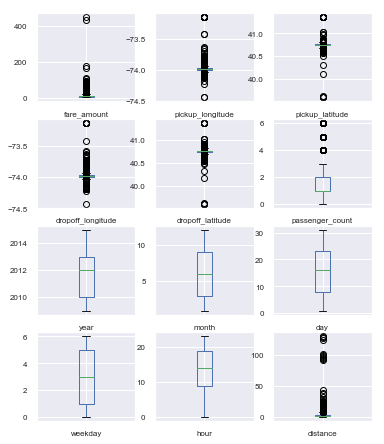

<Figure size 432x288 with 0 Axes>

In [70]:
##################################  Outlier Analysis #############################################################
#Boxplot 
boxplot=train.plot(kind='box', subplots=True, layout=(8,3), sharex=False, sharey=False, fontsize=8)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 3,wspace=0.2, hspace=0.2)
plt.show()
plt.savefig('boxplot_outliers.jpeg')

In [71]:
##Detect and delete outliers from data
def outliers_analysis(df): 
    for i in df.columns:
        print(i)
        q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
        iqr = q75 - q25

        min = q25 - (iqr*1.5)
        max = q75 + (iqr*1.5)
        print(min)
        print(max)
    
        df = df.drop(df[df.loc[:,i] < min].index)
        df = df.drop(df[df.loc[:,i] > max].index)
        return(df)

train = outliers_analysis(train)
test = outliers_analysis(test)

fare_amount
-3.75
22.25
pickup_longitude
-74.02923200000001
-73.93128199999998


In [72]:
# removing rows with vallues as Zero
def eliminate_rows_with_zero_value(df):
    df= df[df!= 0]
    df=df.fillna(df.mean())
    return(df)
    
train = eliminate_rows_with_zero_value(train)
test = eliminate_rows_with_zero_value(test)

In [73]:
#Removing distance greater than 20KM
def proper_data(df):
    df = df[
            ((df['distance'] <20))]
    
    return(df)

train = proper_data(train)
train

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,distance
0,4.500000,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,3.486624,17.000000,1.030764
1,16.900000,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1.000000,16.000000,8.450134
2,5.700000,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3.000000,14.085337,1.389525
3,7.700000,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5.000000,4.000000,2.799270
4,5.300000,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1.000000,7.000000,1.999157
5,12.100000,-74.000964,40.731630,-73.972892,40.758233,1.0,2011,1,6,3.000000,9.000000,3.787239
6,7.500000,-73.980002,40.751662,-73.973802,40.764842,1.0,2012,11,20,1.000000,20.000000,1.555807
7,16.500000,-73.951300,40.774138,-73.990095,40.751048,1.0,2012,1,4,2.000000,17.000000,4.155444
8,15.015004,-74.006462,40.726713,-73.993078,40.731628,1.0,2012,12,3,3.486624,13.000000,1.253232
9,8.900000,-73.980658,40.733873,-73.991540,40.758138,2.0,2009,9,2,2.000000,1.000000,2.849627


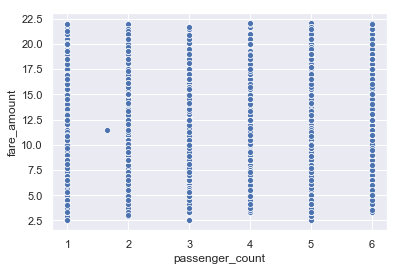

In [74]:
################################################## Bivariate Plots #################################################################################################

cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="passenger_count", y="fare_amount", data= train, palette="Set2")

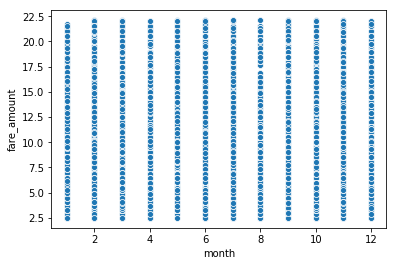

In [39]:
sns.scatterplot(x="month", y="fare_amount", data= train, palette="Set2")



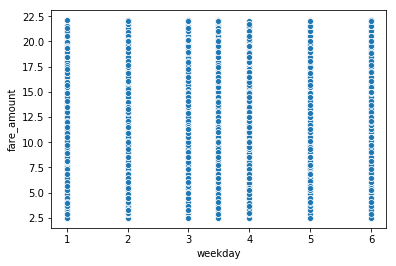

In [32]:
sns.scatterplot(x="weekday", y="fare_amount", data= train, palette="Set2")


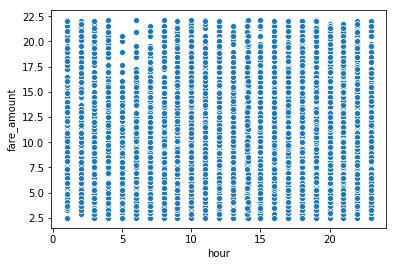

In [33]:
sns.scatterplot(x="hour", y="fare_amount", data= train, palette="Set2")


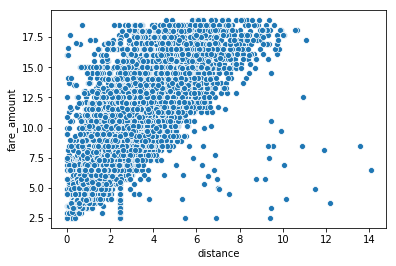

In [53]:
sns.scatterplot(x="distance", y="fare_amount", data= train  ,palette="Set2"    )


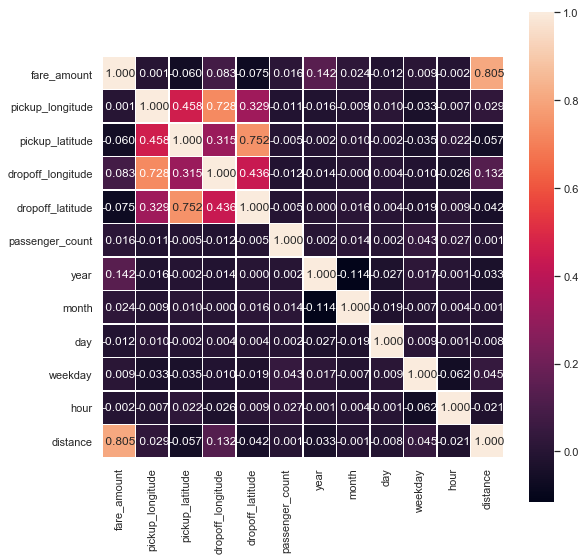

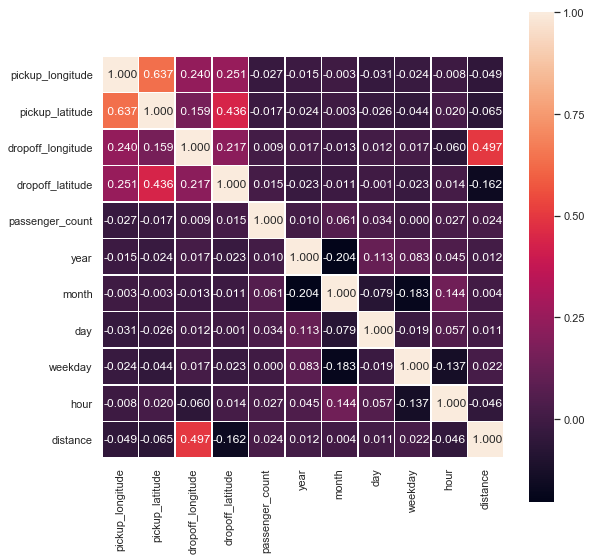

In [75]:
########################### Feature Selection ############################# 
##Correlation analysis
#Correlation plot
def Correlation(df):
    df_corr = df.loc[:,df.columns]
    sns.set()
    plt.figure(figsize=(9, 9))
    corr = df_corr.corr()
    sns.heatmap(corr, annot= True,fmt = " .3f", linewidths = 0.5,
            square=True)
    
Correlation(train)
Correlation(test)

In [76]:
#feature redction
train = train.drop(['pickup_latitude', 'dropoff_latitude', 'pickup_longitude', 'dropoff_longitude','day'], axis=1)

In [77]:
train.head()

,fare_amount,passenger_count,year,month,weekday,hour,distance
0,4.5,1.0,2009,6,3.486624,17.000000,1.030764
1,16.9,1.0,2010,1,1.000000,16.000000,8.450134
2,5.7,2.0,2011,8,3.000000,14.085337,1.389525
3,7.7,1.0,2012,4,5.000000,4.000000,2.799270
4,5.3,1.0,2010,3,1.000000,7.000000,1.999157


In [78]:
test = test.drop(['pickup_latitude', 'dropoff_latitude', 'pickup_longitude', 'dropoff_longitude','day'], axis=1)

In [79]:
test.head()

,passenger_count,year,month,weekday,hour,distance
0,1,2015,1,1.0,13.0,2.323259
1,1,2015,1,1.0,13.0,2.425353
2,1,2011,10,5.0,11.0,0.618628
3,1,2012,12,5.0,21.0,1.961033
4,1,2012,12,5.0,21.0,5.387301


In [80]:
## Splitting DataSets######
X_train = train.loc[:,train.columns != 'fare_amount']
y_train = train['fare_amount']

In [81]:
#Feature Scaling
###Normalisation AS the data is not distributed normally 
def Normalisation(df):
    for i in df.columns:
        df[i] = (df[i] - df[i].min())/(df[i].max() - df[i].min())
        
Normalisation(X_train)
Normalisation(test)

C:\Users\baseer\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [82]:
X_train

,passenger_count,year,month,weekday,hour,distance
0,0.0,0.000000,0.454545,0.497325,0.727273,0.051998
1,0.0,0.166667,0.000000,0.000000,0.681818,0.426314
2,0.2,0.333333,0.636364,0.400000,0.594788,0.070098
3,0.0,0.500000,0.272727,0.800000,0.136364,0.141221
4,0.0,0.166667,0.181818,0.000000,0.272727,0.100854
5,0.0,0.333333,0.000000,0.400000,0.363636,0.191065
6,0.0,0.500000,0.909091,0.000000,0.863636,0.078487
7,0.0,0.500000,0.000000,0.200000,0.727273,0.209641
8,0.0,0.500000,1.000000,0.497325,0.545455,0.063221
9,0.2,0.000000,0.727273,0.200000,0.000000,0.143761


In [175]:
test

,passenger_count,year,month,day,weekday,hour
0,0.0,1.000000,0.000000,0.866667,0.000000,0.545455
1,0.0,1.000000,0.000000,0.866667,0.000000,0.545455
2,0.0,0.333333,0.818182,0.233333,0.800000,0.454545
3,0.0,0.500000,1.000000,0.000000,0.800000,0.909091
4,0.0,0.500000,1.000000,0.000000,0.800000,0.909091
5,0.0,0.500000,1.000000,0.000000,0.800000,0.909091
6,0.0,0.333333,0.818182,0.166667,0.400000,0.500000
8,0.0,0.333333,0.818182,0.166667,0.400000,0.500000
9,0.0,0.833333,0.090909,0.566667,0.000000,0.636364
10,0.0,0.833333,0.090909,0.566667,0.000000,0.636364


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [84]:
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [85]:


###### KNN Modelling ########
def train_KNN(n_neigh):
    knn = KNeighborsRegressor(n_neighbors= n_neigh)
    knn_model = knn.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    print('n_neighbours : {}  ----KNN rmse: {}'.format(n_neigh,(sqrt(mean_squared_error(y_test,y_pred)))))
    print('n_neighbours : {}  ----KNN mape: {}'.format(n_neigh,(sqrt(MAPE(y_test,y_pred)))))

for n_neigh in [10,20,30,40,50,60,70,80,90,100]:
    train_KNN(n_neigh)

n_neighbours : 10  ----KNN rmse: 2.8983530067739682
n_neighbours : 10  ----KNN mape: 5.279236954225384
n_neighbours : 20  ----KNN rmse: 2.9665361636402747
n_neighbours : 20  ----KNN mape: 5.3313769583711865
n_neighbours : 30  ----KNN rmse: 3.025883551020006
n_neighbours : 30  ----KNN mape: 5.384583221568668
n_neighbours : 40  ----KNN rmse: 3.086250335594911
n_neighbours : 40  ----KNN mape: 5.4321329174341
n_neighbours : 50  ----KNN rmse: 3.1414065312225756
n_neighbours : 50  ----KNN mape: 5.473209211664809
n_neighbours : 60  ----KNN rmse: 3.1900555912349353
n_neighbours : 60  ----KNN mape: 5.510440047759615
n_neighbours : 70  ----KNN rmse: 3.2248395746245984
n_neighbours : 70  ----KNN mape: 5.534450319535904
n_neighbours : 80  ----KNN rmse: 3.2642701008209927
n_neighbours : 80  ----KNN mape: 5.571102502938311
n_neighbours : 90  ----KNN rmse: 3.297609931958446
n_neighbours : 90  ----KNN mape: 5.600400080998142
n_neighbours : 100  ----KNN rmse: 3.3280120232075188
n_neighbours : 100  ----

In [91]:
#KNN MODELING 

KNN_model = KNeighborsRegressor(n_neighbors= 10).fit(X_train , y_train)
KNN_pred_train = KNN_model.predict(X_train)
KNN_pred= KNN_model.predict(X_test)
KNN_pred_test = KNN_model.predict(test)
print("Train Data")
print('n_neighbours : {}  ----KNN rmse: {}'.format(n_neigh,  (sqrt(mean_squared_error(y_train,KNN_pred_train)))))
print('n_neighbours : {}  ----KNN mape: {}'.format(n_neigh,(sqrt(MAPE(y_train,KNN_pred_train)))))

print("Test Data")
print('n_neighbours : {}  ----KNN rmse: {}'.format(n_neigh,  (sqrt(mean_squared_error(y_test,KNN_pred)))))
print('n_neighbours : {}  ----KNN mape: {}'.format(n_neigh,(sqrt(MAPE(y_test,KNN_pred)))))

KNN_model.score(X_train, y_train)

Train Data
n_neighbours : 100  ----KNN rmse: 2.6079425339636284
n_neighbours : 100  ----KNN mape: 5.021265945581793
Test Data
n_neighbours : 100  ----KNN rmse: 2.8983530067739682
n_neighbours : 100  ----KNN mape: 5.279236954225384


0.6003075829633684

In [87]:
####### Linear Regression ######
ols = LinearRegression()
ols_model = ols.fit(X_train, y_train)
y_pred_train = ols_model.predict(X_train)
y_pred = ols_model.predict(X_test)
y_pred_test = ols_model.predict(test)
print("Train Data")
print('Ordinary Least Squares rmse: {}'.format(sqrt(mean_squared_error(y_train,y_pred_train))))
print('Ordinary Least Squares mape: {}'.format(sqrt(MAPE(y_train,y_pred_train))))

print("Test Data")
print('Ordinary Least Squares rmse: {}'.format(sqrt(mean_squared_error(y_test,y_pred))))
ols_model.score(X_train, y_train)

Train Data
Ordinary Least Squares rmse: 2.367790983098614
Ordinary Least Squares mape: 4.509954219310796
Test Data
Ordinary Least Squares rmse: 2.241862183668402


0.6705294516779501

In [88]:
###### DecisionTree Modelling ##########
def DT(depth):
    dt = tree.DecisionTreeRegressor( max_depth = depth)
    dt_model = dt.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    print('depth : {} ----  Decision Tree rmse: {}'.format(depth,(sqrt(mean_squared_error(y_test,y_pred)))))
    
for depth in [1,2,5,10,20]:
    DT(depth)
    
dt_model = tree.DecisionTreeRegressor(max_depth =2).fit(X_train, y_train)
dt_pred_train = dt_model.predict(X_train)
dt_pred= dt_model.predict(X_test)
print("Train Data")
print('Decision Tree rmse: {}'.format(sqrt(mean_squared_error(y_train,dt_pred_train))))
print('Decision Tree mape: {}'.format(sqrt(MAPE(y_train,dt_pred_train))))

print("Test Data")
print('Decision Tree rmse: {}'.format(sqrt(mean_squared_error(y_test,dt_pred))))
dt_model.score(X_train, y_train)

depth : 1 ----  Decision Tree rmse: 2.991881898705689
depth : 2 ----  Decision Tree rmse: 2.483925603630942
depth : 5 ----  Decision Tree rmse: 2.200661302583619
depth : 10 ----  Decision Tree rmse: 2.446398071727962
depth : 20 ----  Decision Tree rmse: 3.042476064445569
Train Data
Decision Tree rmse: 2.493424498531671
Decision Tree mape: 4.766396172879622
Test Data
Decision Tree rmse: 2.4839256036309423


0.6346388897092561

In [90]:
###### RandomForest Modelling ##########
def train_RF(n_est, depth):
    rf = RandomForestRegressor(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    print('depth : {}, n_estimators : {}  ---- Random Forest Regression rmse: {}'.format(depth, n_est, (sqrt(mean_squared_error(y_test,y_pred)))))  

for n_est in [100,200,300,400,500]:
    for depth in [2, 5, 10 , 20, 30]:
        train_RF(n_est, depth)
        
        rf_model = RandomForestRegressor(max_depth= 5, n_estimators = 100).fit(X_train , y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred= rf_model.predict(X_test)
print("Train Data")
print('Random Forest rmse: {}'.format(sqrt(mean_squared_error(y_train,rf_pred_train))))
print('Random Forest mape: {}'.format(sqrt(MAPE(y_train,rf_pred_train))))

print("Test Data")
print('Random Forest rmse: {}'.format(sqrt(mean_squared_error(y_test,rf_pred))))
rf_model.score(X_train, y_train)

depth : 2, n_estimators : 100  ---- Random Forest Regression rmse: 2.4357286464967856
depth : 5, n_estimators : 100  ---- Random Forest Regression rmse: 2.1679354073340593
depth : 10, n_estimators : 100  ---- Random Forest Regression rmse: 2.14556272997487
depth : 20, n_estimators : 100  ---- Random Forest Regression rmse: 2.199635945907804
depth : 30, n_estimators : 100  ---- Random Forest Regression rmse: 2.1926529916137754
depth : 2, n_estimators : 200  ---- Random Forest Regression rmse: 2.4349873660751293
depth : 5, n_estimators : 200  ---- Random Forest Regression rmse: 2.17309846412755
depth : 10, n_estimators : 200  ---- Random Forest Regression rmse: 2.1505278641627616
depth : 20, n_estimators : 200  ---- Random Forest Regression rmse: 2.201144560853385
depth : 30, n_estimators : 200  ---- Random Forest Regression rmse: 2.1946371020986994
depth : 2, n_estimators : 300  ---- Random Forest Regression rmse: 2.4363454258289634
depth : 5, n_estimators : 300  ---- Random Forest Regr

0.7265147323845697

In [ ]:
##################MODEL SELECTION ########################

#n_neighbours : 100  ----KNN rmse: 2.6079425339636284
#n_neighbours : 100  ----KNN mape: 5.021265945581793
#score =  0.6003075829633684

#Ordinary Least Squares rmse: 2.367790983098614
#Ordinary Least Squares mape: 4.509954219310796
#score =  0.6705294516779501

#Decision Tree rmse: 2.493424498531671
#Decision Tree mape: 4.766396172879622
#score= 0.6346388897092561

#Random Forest rmse: 2.157257716683359
#Random Forest mape: 4.303135135131023
#score=  0.7265147323845697


In [93]:
#Freezing Random Forest Regression by comparing the 
#1.rmse =2.157257716683359( minimum rmse)
#2.Mape =4.303135135131023( minimum MAPE)
#3.model score = 0.7265147323845697 ( maximum score )

random_forest_test= rf_model.predict(test)

In [94]:
#converting the result into a data frame 
result= pd.DataFrame()
result["fare_amount"] = random_forest_test

In [95]:
#predicted result
result

,fare_amount
0,7.310591
1,7.370473
2,4.745531
3,5.748021
4,10.276262
5,7.772477
6,4.745531
7,8.095122
8,4.935574
9,7.310591


In [96]:
#writing into a csv file 
result.to_csv("result.csv")

In [97]:
test["pedicted fare"]=result

In [98]:
#head of predicted test observations  
test.head()

,passenger_count,year,month,weekday,hour,distance,pedicted fare
0,0.0,1.000000,0.000000,0.0,0.545455,0.069076,7.310591
1,0.0,1.000000,0.000000,0.0,0.545455,0.072114,7.370473
2,0.0,0.333333,0.818182,0.8,0.454545,0.018346,4.745531
3,0.0,0.500000,1.000000,0.8,0.909091,0.058296,5.748021
4,0.0,0.500000,1.000000,0.8,0.909091,0.160261,10.276262
